In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string
from wordcloud import WordCloud

In [3]:
# Cargamos el df
BW_df = pd.read_csv('./Opiniones_Trip.csv', encoding = "utf8")
BW_df

,calificacion,fecha,nombre,opinion
0,ui_bubble_rating bubble_50,mayo de 2020,Laalyyss,"El Hotel es una reliquia, un techo espectacula..."
1,ui_bubble_rating bubble_50,abril de 2021,Maria de Lourde... F,Es un excelente lugar para compartir pues la a...
2,ui_bubble_rating bubble_50,abril de 2021,Monse Navarro,Muy buen ambiente en la terraza la verdad pasa...
3,ui_bubble_rating bubble_50,abril de 2021,Alice R,"Excelente servicio por Alejandro, capitán Cesa..."
4,ui_bubble_rating bubble_50,abril de 2021,Mario M,Todo muy delicioso y muy buena atención 10/ 1...
...,...,...,...,...
5114,ui_bubble_rating bubble_50,mayo de 2018,Cecilia M,El hotel nos parece precioso la comida muy ric...
5115,ui_bubble_rating bubble_50,mayo de 2018,Virginia M,Excelente ante Colón por parte de Manuel flore...
5116,ui_bubble_rating bubble_50,mayo de 2018,Ana Julia C,Excelente atención de Manuel Flores y María Ca...
5117,ui_bubble_rating bubble_50,mayo de 2018,ROSENDA ALEJAND... R,En especial el lugar es muy bueno los alimento...


In [4]:
# Vemos la información del dataset
BW_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5119 entries, 0 to 5118
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   calificacion  5119 non-null   object
 1   fecha         5116 non-null   object
 2   nombre        5119 non-null   object
 3   opinion       5119 non-null   object
dtypes: object(4)
memory usage: 160.1+ KB


In [5]:
# Buscamos los 3  datos faltantes
BW_df[BW_df["fecha"].isna()]

,calificacion,fecha,nombre,opinion
8,ui_bubble_rating bubble_40,NaN,Wanderer21494,"Mis amigos y yo, nos encontramos tiradísimos..."
2346,ui_bubble_rating bubble_50,NaN,JShereshewsky,Teníamos una suite espaciosa y bien equipada c...
3511,ui_bubble_rating bubble_40,NaN,Alice R,"Hotel encantador, un hermoso techo de vestíbul..."


In [6]:
# Rellenamos con los datos más proximo superior (ffill), podríamos tambien hacerlo con el dato más próximo inferior (backfill)
BW_df.fillna(method = "ffill", inplace = True)

In [7]:
# Eliminamos los duplicados
BW_df.drop_duplicates(inplace = True)

In [8]:
# Verificamos que ya no haya valores nulos
BW_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5119 entries, 0 to 5118
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   calificacion  5119 non-null   object
 1   fecha         5119 non-null   object
 2   nombre        5119 non-null   object
 3   opinion       5119 non-null   object
dtypes: object(4)
memory usage: 200.0+ KB


In [9]:
# Empezamos a tranformar los datos necesarios
BW_df.head(5)

,calificacion,fecha,nombre,opinion
0,ui_bubble_rating bubble_50,mayo de 2020,Laalyyss,"El Hotel es una reliquia, un techo espectacula..."
1,ui_bubble_rating bubble_50,abril de 2021,Maria de Lourde... F,Es un excelente lugar para compartir pues la a...
2,ui_bubble_rating bubble_50,abril de 2021,Monse Navarro,Muy buen ambiente en la terraza la verdad pasa...
3,ui_bubble_rating bubble_50,abril de 2021,Alice R,"Excelente servicio por Alejandro, capitán Cesa..."
4,ui_bubble_rating bubble_50,abril de 2021,Mario M,Todo muy delicioso y muy buena atención 10/ 1...


In [10]:
# Tranformemos la calificación a un número únicamente qie es el penúltimo de la cadena
for i, cali in enumerate(BW_df['calificacion']):
    new_cal = cali[-2:-1]
    BW_df['calificacion'][i] = int(new_cal)

In [11]:
BW_df["calificacion"] = BW_df["calificacion"].astype(int)

In [12]:
meses = {"enero": 1, "febrero": 2, "marzo": 3, "abril": 4, "mayo": 5, "junio": 6, "julio": 7, "agosto": 8, "septiembre": 9, "octubre": 10, "noviembre": 11, "diciembre": 12}

In [13]:
# Transformamos la fecha a mes y año
mes = []
año = []
for i, fecha in enumerate(BW_df["fecha"]):
    m = fecha.split()[0]
    a = int(fecha.split()[-1])
    
    if m in meses.keys():
        m_numero = m.replace(m, str(meses.get(m)))
    mes.append(int(m_numero))
    año.append(a)

BW_df["mes"] = mes
BW_df["año"] = año

In [14]:
# Eliminamo la fecha ya que tenemos el mes y año en otars columnas
BW_df.drop('fecha', axis = 1, inplace = True)

In [15]:
# Volvemos a ver los datos para ver como quedarón
BW_df.head(8)

,calificacion,nombre,opinion,mes,año
0,5,Laalyyss,"El Hotel es una reliquia, un techo espectacula...",5,2020
1,5,Maria de Lourde... F,Es un excelente lugar para compartir pues la a...,4,2021
2,5,Monse Navarro,Muy buen ambiente en la terraza la verdad pasa...,4,2021
3,5,Alice R,"Excelente servicio por Alejandro, capitán Cesa...",4,2021
4,5,Mario M,Todo muy delicioso y muy buena atención 10/ 1...,4,2021
5,4,Louise_Parker,Este hotel está ubicado lejos de la zona princ...,8,2007
6,4,Arlene L,Pasamos tres noches en el Gran Hotel de la Ciu...,3,2007
7,5,BeeceeBrisbane,Nos alojamos aquí 4 noches y nos encantó. La u...,5,2006


In [16]:
# Concideraremos que las calificaciones mayores o iguales a 4 quiere decir que es un buen hotel (1) y menos a 4 malos (0)
retroalimentacion = []
for i in BW_df["calificacion"]:
    if i >= 4:
        retroalimentacion.append(1)
    else:
        retroalimentacion.append(0)
        
BW_df["retroalimentacion"] = retroalimentacion

In [17]:
# El nombre de los usuarios en ésta ocasión no nos será de mucha utilidad por lo que sería mejor eliminarla
BW_df.drop("nombre", axis = 1, inplace = True)

In [18]:
sns.set_style('whitegrid')

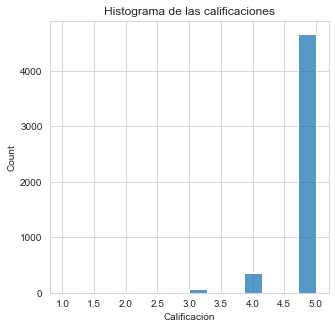

In [19]:
# Empezamos a hacer una representación gráfica de los datos que tenemos para intentar encontrar dtos interesantes
# Histograma de las calificaciones
plt.figure(figsize = (5,5))
sns.histplot(x = "calificacion", data = BW_df)
plt.title("Histograma de las calificaciones")
plt.xlabel("Calificación")
plt.show()

In [20]:
# Pocerntaje de calificación
TOTAL_OPINIONES = BW_df.shape[0]
for i in range(1,6):
    procentaje = BW_df[BW_df["calificacion"] == i].shape[0] / TOTAL_OPINIONES
    print("Porcentaje con calificación {} es {:.5f}%".format(i, procentaje*100))
    
print("Debe mejorar 0.018%")
print("Es bueno 98.113%")

Porcentaje con calificación 1 es 0.17582%
Porcentaje con calificación 2 es 0.39070%
Porcentaje con calificación 3 es 1.30885%
Porcentaje con calificación 4 es 6.93495%
Porcentaje con calificación 5 es 91.18969%
Debe mejorar 0.018%
Es bueno 98.113%


In [21]:
BW_df

,calificacion,opinion,mes,año,retroalimentacion
0,5,"El Hotel es una reliquia, un techo espectacula...",5,2020,1
1,5,Es un excelente lugar para compartir pues la a...,4,2021,1
2,5,Muy buen ambiente en la terraza la verdad pasa...,4,2021,1
3,5,"Excelente servicio por Alejandro, capitán Cesa...",4,2021,1
4,5,Todo muy delicioso y muy buena atención 10/ 1...,4,2021,1
...,...,...,...,...,...
5114,5,El hotel nos parece precioso la comida muy ric...,5,2018,1
5115,5,Excelente ante Colón por parte de Manuel flore...,5,2018,1
5116,5,Excelente atención de Manuel Flores y María Ca...,5,2018,1
5117,5,En especial el lugar es muy bueno los alimento...,5,2018,1


In [22]:
# Eliminamos la calificación ya que tenemos ahora la retroalimentación para guiarnos
BW_df.drop("calificacion", axis = 1, inplace = True)

<AxesSubplot:>

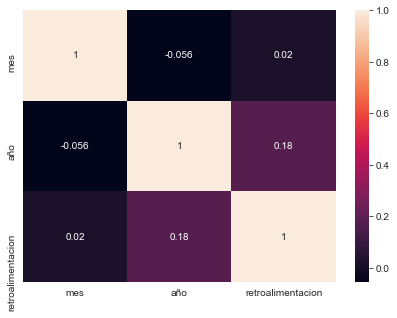

In [23]:
# Haremós un mpa de correlación para ver si hay alguna relación núemrica que aún no hayamos visto
corr = BW_df.corr()

plt.figure(figsize = (7,5))
sns.heatmap(corr, annot = True)

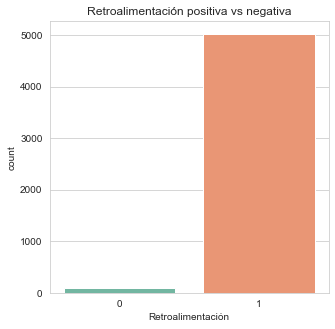

In [24]:
# Viendo de otra manera las críticas del hotel
plt.figure(figsize = (5,5))
sns.countplot(x = "retroalimentacion", data = BW_df, palette = "Set2")
plt.title("Retroalimentación positiva vs negativa")
plt.xlabel("Retroalimentación")
plt.show()

Text(0.5, 0, 'Año')

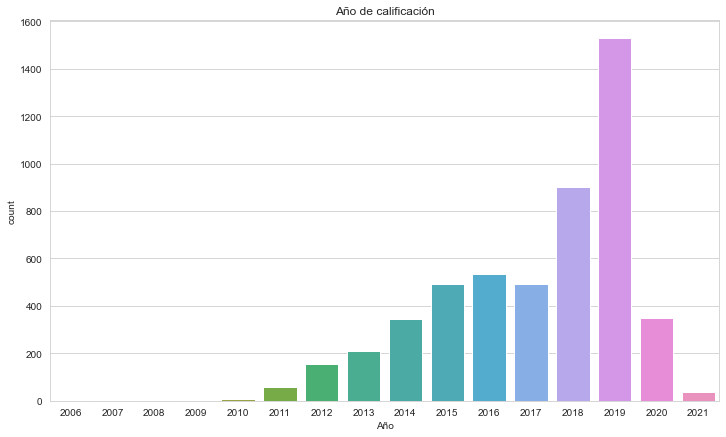

In [25]:
# ¿De que año son las criticas?
plt.figure(figsize = (12,7))
sns.countplot(x = "año", data =  BW_df)
plt.title("Año de calificación")
plt.xlabel("Año")

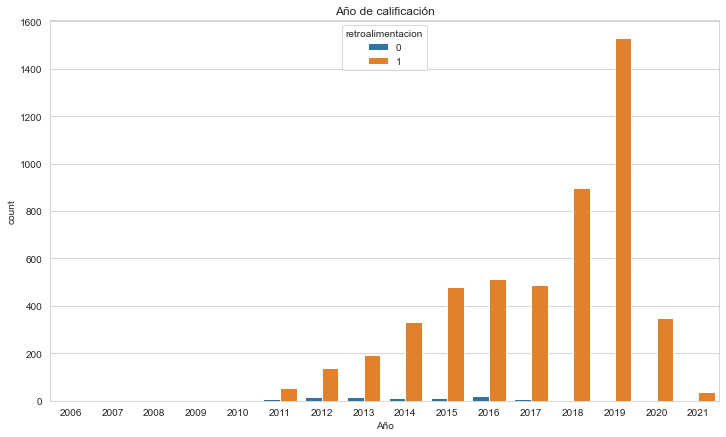

In [26]:
# ¿Hay una relevancia entre la retroalimentación y el año?
plt.figure(figsize = (12,7))
sns.countplot(x = "año", data =  BW_df, hue = "retroalimentacion")
plt.title("Año de calificación")
plt.xlabel("Año")
plt.show()

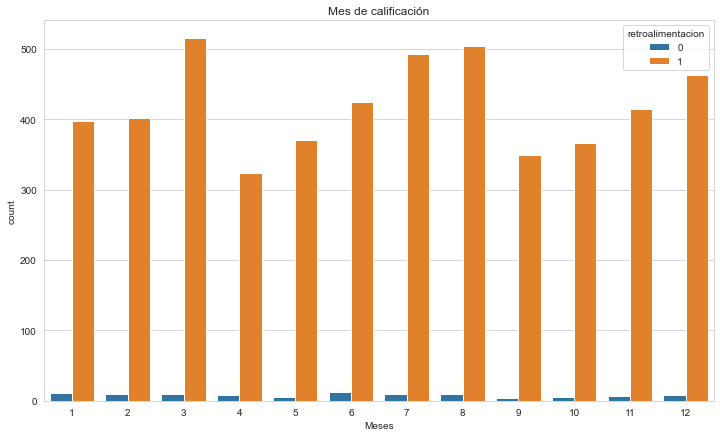

In [27]:
# ¿Hay una relación con los meses?
plt.figure(figsize = (12,7))
sns.countplot(x = "mes", data =  BW_df, hue = "retroalimentacion")
plt.title("Mes de calificación")
plt.xlabel("Meses")
plt.show()

Text(0.5, 1.0, 'Acumulación de las opiniones con respecto al año')

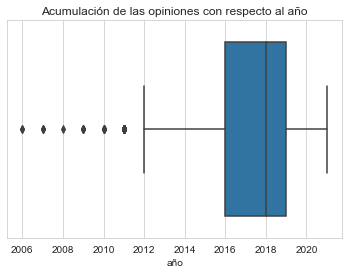

In [28]:
# Boxplot para ver en donde se acumulan las opiniones de los usuarios
sns.boxplot(x = "año", data = BW_df)
plt.title("Acumulación de las opiniones con respecto al año")

In [29]:
print("*****Porcentaje de opiniones por año*****")
TOTAL = BW_df.shape[0]
for i in range(6,10):
    año = (BW_df["año"] == (2000+i)).sum()
    print("\naño 200{} porcentaje de opiniones: {:.5F}% \nes un total de {}".format(i, (año/TOTAL)*100, año))
for i in range(10,22):
    año = (BW_df["año"] == (2000+i)).sum()
    print("\naño 20{} porcentaje de opiniones: {:.5F}% \nes un total de {}".format(i, (año/TOTAL)*100, año))   

*****Porcentaje de opiniones por año*****

año 2006 porcentaje de opiniones: 0.03907% 
es un total de 2

año 2007 porcentaje de opiniones: 0.05861% 
es un total de 3

año 2008 porcentaje de opiniones: 0.01954% 
es un total de 1

año 2009 porcentaje de opiniones: 0.09768% 
es un total de 5

año 2010 porcentaje de opiniones: 0.13675% 
es un total de 7

año 2011 porcentaje de opiniones: 1.13303% 
es un total de 58

año 2012 porcentaje de opiniones: 3.04747% 
es un total de 156

año 2013 porcentaje de opiniones: 4.06329% 
es un total de 208

año 2014 porcentaje de opiniones: 6.75913% 
es un total de 346

año 2015 porcentaje de opiniones: 9.59172% 
es un total de 491

año 2016 porcentaje de opiniones: 10.43172% 
es un total de 534

año 2017 porcentaje de opiniones: 9.65032% 
es un total de 494

año 2018 porcentaje de opiniones: 17.58156% 
es un total de 900

año 2019 porcentaje de opiniones: 29.84958% 
es un total de 1528

año 2020 porcentaje de opiniones: 6.83727% 
es un total de 350

año 

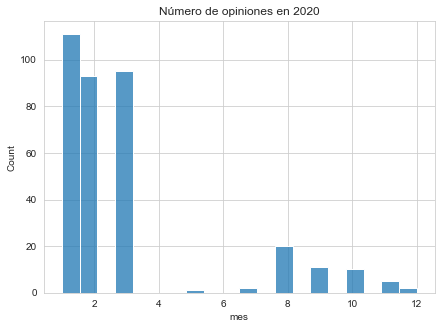

In [30]:
# Año critico 2020 pandemia
plt.figure(figsize = (7,5))
sns.histplot(x = "mes", data = BW_df[BW_df["año"] == 2020])
plt.title("Número de opiniones en 2020")
plt.show()

In [31]:
# Guardamos la información pre procesada
BW_df.to_csv("Preprocesado_Trip.csv")

In [34]:
# Procesamiento de los datos
# Las opiniones: Serán removidas las stopwords, los signos y lo números
# STOPWORDS
nltk.download('stopwords')
STOPWORDS_SPANISH = nltk.corpus.stopwords.words('spanish')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP-001\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
# Agregamos una palabra que seguro se repetirá mucho y no es necesaria "Hotel" y "Hoteles"
STOPWORDS_SPANISH.append("hotel")
STOPWORDS_SPANISH.append("hoteles")

In [36]:
# CARACTERES ESPECIALES
signos = list(string.punctuation)

In [37]:
# NUMEROS
numeros = list(["0","1","2","3","4","5","6","7","8","9"])

In [38]:
opiniones = []
for phrase in BW_df["opinion"]:
    opinion = [word for word in phrase.split() if word.lower() not in STOPWORDS_SPANISH]
    opiniones.append(" ".join(opinion))

In [39]:
new_opiniones = []
for opinion in opiniones:
    sin_signos = [char for char in opinion if char not in signos]
    new_opiniones.append("".join(sin_signos))

In [40]:
clean_opinions = []
for opinion in new_opiniones:
    sin_num = [char for char in opinion if char not in numeros]
    clean_opinions.append("".join(sin_num))

In [41]:
# Sustituirimos la variable opinion con las nuevas
BW_df["opinion"] = clean_opinions

In [42]:
BW_df

,opinion,mes,año,retroalimentacion
0,reliquia techo espectacular agua manzanas mesa...,5,2020,1
1,excelente lugar compartir pues atencion srita ...,4,2021,1
2,buen ambiente terraza verdad pasamos rato agra...,4,2021,1
3,Excelente servicio Alejandro capitán Cesar Mon...,4,2021,1
4,delicioso buena atención excelente lugar pas...,4,2021,1
...,...,...,...,...
5114,parece precioso comida rica servicio excelente...,5,2018,1
5115,Excelente Colón parte Manuel flores María Cand...,5,2018,1
5116,Excelente atención Manuel Flores María Candela...,5,2018,1
5117,especial lugar bueno alimentos increibles grac...,5,2018,1


In [43]:
# Sepraemos las opiniones buenas de las malas
buenas = ""
malas = ""
for i, cal in enumerate(BW_df["retroalimentacion"]):
    if cal == 1:
        buenas += BW_df["opinion"][i]
    else:
        malas += BW_df["opinion"][i]

In [44]:
wordcloud1 = WordCloud().generate(buenas)
wordcloud2 = WordCloud().generate(malas)

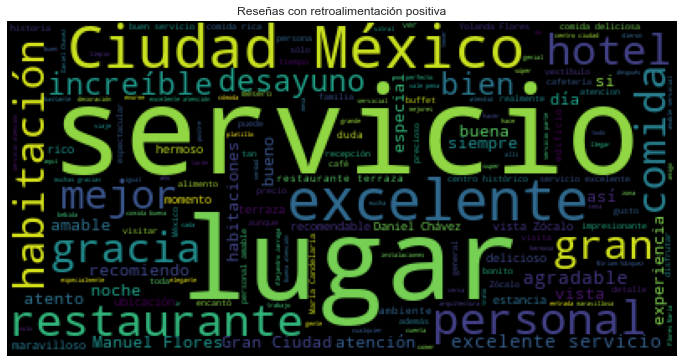

In [45]:
# Las palabras más usadas en la retroalimentación positiva
plt.figure(figsize = (12,12))
plt.imshow(wordcloud1)
plt.title("Reseñas con retroalimentación positiva")
plt.grid(False)
plt.axis(False)
plt.show()

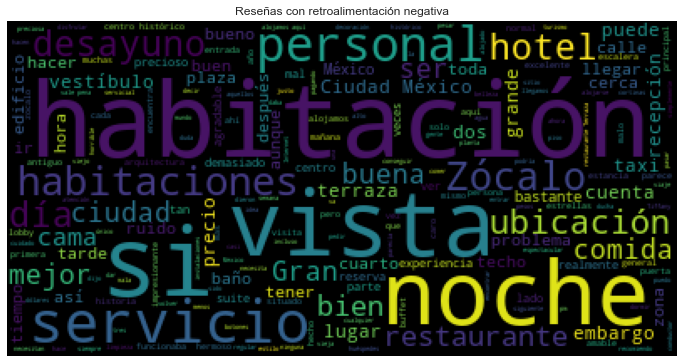

In [46]:
# Las palabras más usadas en la retroalimentación negativa
plt.figure(figsize = (12,12))
plt.imshow(wordcloud2)
plt.title("Reseñas con retroalimentación negativa")
plt.grid(False)
plt.axis(False)
plt.show()

In [1]:
# Guardamos la información pre procesada
# BW_df.to_csv("Preprocesado_Trip.csv")

In [107]:
# Vemos el dataset original para ver las opiniones competas
original_df = pd.read_csv("./GranHotelCDMX_trip.csv", encoding = "utf8")

In [108]:
# Viendo opiniones con retroalimentación positiva con la palabra habitación
opiniones_buenas = []
# Viendo opiniones con retroalimentación negativa con la palabra habitación
opiniones_malas = []

# Buscamos todas las opiniones con la palabra habitación
opiniones = original_df.loc[original_df["opinion"].str.contains("si ")]

In [109]:
# Tranformemos la calificación a un número únicamente qie es el penúltimo de la cadena
for i, cali in enumerate(original_df['calificacion']):
    new_cal = cali[-2:-1]
    original_df['calificacion'][i] = int(new_cal)
    
original_df["calificacion"] = original_df["calificacion"].astype(int)

In [110]:
original_df[original_df["calificacion"] >= 4]["opinion"]

0       Es un buen desayuno desde la fruta rica y vast...
1       Nos encantó desayunar en la terraza del hotel....
2       Muy recomendable un lugar seguro, agradable , ...
3       Excelente servicio y calidad en todos los aspe...
4       Los señores alejandro,alfredo,daniel y hugo , ...
                              ...                        
5083    El hotel es bello desde la entrada con el pers...
5084    Todo muy bien excelente servicio de Manuel flo...
5085    Exelente servicio la comida deliciosa gran var...
5086    El hotel esta ubicando en pleno centro histori...
5087    Excelente servicio, los alimentos deliciosos y...
Name: opinion, Length: 4992, dtype: object

In [111]:
original_df[original_df["calificacion"] < 4]["opinion"]

46      Desde el aeropuerto, llegamos al Gran en taxi,...
49      estancia en otro sitio, esto no es un gran o u...
68      No tuvimos ningún problema con el ruido. habit...
69      Nos alojamos 3 noches. Muy pocos personal pero...
87      Llegamos cerca de 11:00 p.m. y el servicio de ...
                              ...                        
4100    Un hotel muy bonito en pleno centro de la ciud...
4685    Lo mejor su ubicación está en el centro de la ...
4804    Punto a mejorar, en grupos grandes de mas de 2...
4836    Me quedé una noche en este hotel. Si bien el e...
4900    Al entrar al hotel es como si te transportaras...
Name: opinion, Length: 96, dtype: object

In [115]:
# Opiniones buenas
print(original_df["opinion"][2], end = "\n\n")
print(original_df["opinion"][4], end = "\n\n")
print(original_df["opinion"][5084], end = "\n\n")

Muy recomendable un lugar seguro, agradable , y los platillos riquísimos aparte de la.vista es hermosa   Los meseros Ventura Fernando Miriam la cocinera Tania y el capitán cesar Mondragón excelentes anfitriones ...siempre atentos y agradables ..

Los señores alejandro,alfredo,daniel y hugo , nos atendieron muy bien! Un gran servicio , el buffet delicioso !! Una vista maravilosa se los recomiendo para desayunar o comer con la familia y amigos...un placer disfrutarlo con una bellas amigas y mi linda hija .....gracias por el servicio...

Todo muy bien excelente servicio de Manuel flores y María c muy buena atención la vista muy bonita el lugar de maravilla gracias por todo fue una xperiencia unika todo fue muy bueno gracias por el servicio Manuel y María



In [114]:
# Opiniones malas
print(original_df["opinion"][46], end = "\n\n")
print(original_df["opinion"][49], end = "\n\n")
print(original_df["opinion"][68], end = "\n\n")

Desde el aeropuerto, llegamos al Gran en taxi, nos dejaron en la calle. Nos arrastraban las maletas pesadas por las entradas tramo de escaleras a lo que parecía una ciudad desierto estación sin ningún tren o líneas de tren. En la lejana diagonal esquina a través de la luz de merky, sábado el portero, inmóvil. llegamos nosotros frente a la recepción y nos dieron una habitación y llevado por el portero. Nos sentimos de hereonin cacooned. Ahora estamos en el tiempo. Las habitaciones son estilo victoriano en todos los sentidos, en esencia, el hotel es una mauseleum. No lo recomendaría. Por desgracia no tuvimos la vista en los sitios web, nos daba directamente a la pared del edificio colindante. Algo inundó el baño - no estamos seguros si fue causado por la ducha del baño.

estancia en otro sitio, esto no es un gran o un buen hotel.

Todo muy bien excelente servicio de Manuel flores y María c muy buena atención la vista muy bonita el lugar de maravilla gracias por todo fue una xperiencia un